请实现一个简易的文本文件读写系统，提供如下文件操作功能：

- TextFileSys() -- 系统初始化，此时无任何文件

- open(string filename, string mode) -- 打开或新建文件。打开模式 mode 仅为 r 、 r+ 、w 、w+ 、a 、a+ ：

  - 文件 filename 不存在：仅当 mode 为 r 或 r+ 时失败，其它模式下会新建此文件并打开成功。

  - 文件 filename 已存在：处于未打开状态时，打开成功；处于已打开状态时，打开失败。

  成功打开后，按下表处理，并返回 0； 失败返回 -1 。

  - 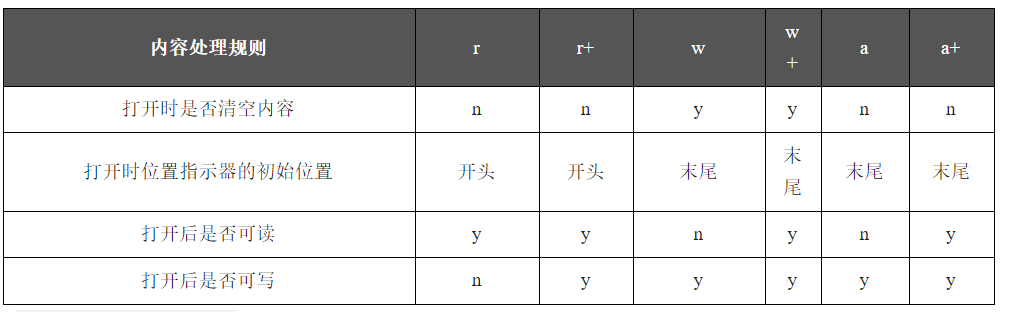
  
- close(string filename) -- 关闭文件 filename

  - 若文件处于打开状态，则关闭该文件、并返回 0； 否则，返回 -1 。

- write(string filename, string content) -- 往文件 filename 中写入内容 content

  - 若文件处于打开状态且可写，则按照「内容处理规则」，在位置指示器的当前位置写入content内容，返回写入后文件内容的长度；否则，返回 -1 。

  - 写入后，位置指示器移动到本次写入内容的末尾。

- readAll(string filename) -- 读出文件 filename 中的全部内容

  - 若文件处于打开状态且可读，则按照「内容处理规则」，读出文件全部内容并返回；当内容为空时，返回字符串null；否则，返回字符串 error 。

  - readAll 操作不改变位置指示器。

- r: 以只读方式打开已存在的文件; r+: 以读写方式打开一个已存在的文件。
- w: 以只写方式打开或新建一个文件。 w+: 以读写方式打开或新建一个文件。
- a：以追加方式打开或新建一个文件，用于写。 a+: 以追加方式打开或新建一个文件，用于读写。

### 输入

首行一个整数 num，表示文件操作的个数，1 <= num <= 100
接下来 num 行，每行一个文件操作，格式为 操作=参数1 参数2 …

filename 仅为字母和数字，1 <= filename.length <= 10
content 仅为不含空格的可见字符，1 <= content.length <= 10

### 输出

```
逐行输出这 num 个操作的返回值

样例1
输入：

7
TextFileSys
open=file1 w
open=file2 a
write=file1 engineer
close=file1
readAll=file1
readAll=file2
输出：

null
0
0
8
0
error
error
解释：

第四条命令 write=file1 engineer，往文件file1 写入内容 engineer，返回写入后文件内容长度 8 。
第六条命令 readAll=file1 执行时，file1已关闭，因此返回 error 。
第七条命令 readAll=file2 执行时，因为文件以 a 模式打开，不能读，返回 error

样例2
输入：

11
TextFileSys
open=f a
write=f hello
close=f
open=f w+
readAll=f
write=f how
close=f
open=f a+
write=f areyou
readAll=f
输出：

null
0
5
0
0
null
3
0
0
9
howareyou
解释：

第五条命令： w+ 模式打开文件后，内容被清空，因此第六条命令 readAll 返回字符串 null 。
第九条命令： a+ 模式打开后，位置指示器位于文件内容结尾；第十条命令，新写入内容追加在原内容后面。最后的命令 readAll，返回文件全部内容 howareyou

样例3
输入：

9
TextFileSys
open=f w+
write=f engineer
close=f
open=f r+
write=f hello
readAll=f
write=f world
readAll=f
输出：

null
0
8
0
0
8
helloeer
10
helloworld
解释：

r+ 模式打开后，位置指示器位于文件内容开头，新写入内容会从前往后覆盖内容，未被覆盖的内容保持不变：

·         write=f hello 写入后，已有内容从 engineer 变成 helloeer，指示器指向 o 后面的位置；

·         write=f world 再写入时，覆盖了 eer ，写入后最终变成 helloworld

In [214]:
class TextFileSys:
    def __init__(self) -> None:
        # 0表示打开,1表示关闭
        # 指示器初始位置
        self.file_dict = {}

    def open(self, filename: str, mode: str):
        is_open = False
        # 文件不存在
        if not self.file_dict.get(filename) and mode not in ['r', 'r+']:
            is_open = True
            self.file_dict[filename] = {
                'status': 0,
                'content': '',
                'index': 0, # 0表示起始位置,1表示末尾
                'read': True,
                'write': True
            }
        # 文件存在
        elif self.file_dict.get(filename) and self.file_dict[filename]['status'] == 1:
            is_open = True
            self.file_dict[filename]['status'] = 0
        if is_open:
            if mode in ['w', 'w+']:
                self.file_dict[filename]['content'] = ''
            if mode not in ['r', 'r+']:
                self.file_dict[filename]['index'] = len(self.file_dict[filename]['content'])
            else:
                self.file_dict[filename]['index'] = 0
            if mode in ['w', 'a']:
                self.file_dict[filename]['read'] = False
            else:
                self.file_dict[filename]['read'] = True
            if mode == 'r':
                self.file_dict[filename]['write'] = False
            else:
                self.file_dict[filename]['write'] = True
        return -int(not is_open)
    
    def close(self,filename: str):
        if self.file_dict[filename]['status'] == 0:
            self.file_dict[filename]['status'] = 1
            return 0
        return -1
    
    def write(self,filename: str, content: str):
        file = self.file_dict[filename]
        if file['status'] == 0 and file['write']:
            index = file['index']
            self.file_dict[filename]['index'] = len(content)+index
            content = file['content'][:index]+content+file['content'][index+len(content):]
            self.file_dict[filename]['content'] = content
            return len(content)
        else:
            return -1
    
    def readALL(self,filename: str):
        file = self.file_dict[filename]
        if file['status'] == 0 and file['read']:
            if file['content']:
                return file['content']
            else:
                return 'null'
        return 'error'
            

In [215]:
sol = TextFileSys()

In [216]:
sol.open('file1','w')

0

In [217]:
sol.open('file2','a')

0

In [218]:
sol.write('file1','engineer')

8

In [219]:
sol.close('file1')

0

In [220]:
sol.readALL('file1')

'error'

In [221]:
sol.readALL('file2')

'error'

In [222]:
sol2 = TextFileSys()

In [223]:
sol2.open('f','a')

0

In [224]:
sol2.write('f','hello')

5

In [225]:
sol2.close('f')

0

In [226]:
sol2.open('f','w+')

0

In [227]:
sol2.readALL('f')

'null'

In [228]:
sol2.write('f','how')

3

In [229]:
sol2.close('f')

0

In [230]:
sol2.open('f','a+')

0

In [231]:
sol2.write('f','areyou')

9

In [232]:
sol2.readALL('f')

'howareyou'

In [233]:
sol3 = TextFileSys()

In [234]:
sol3.open('f','w+')

0

In [235]:
sol3.write('f','engineer')

8

In [236]:
sol3.close('f')

0

In [237]:
sol3.open('f','r+')

0

In [238]:
sol3.write('f','hello')

8

In [239]:
sol3.readALL('f')

'helloeer'

In [240]:
sol3.write('f','world')

10

In [241]:
sol3.file_dict

{'f': {'status': 0,
  'content': 'helloworld',
  'index': 10,
  'read': True,
  'write': True}}

In [242]:
sol3.readALL('f')

'helloworld'